# Chapter 5: Sentiment analysis with the perceptron algorithm
## Assignment - 3: The Perceptron. Question 1,2,3

**Group 2<br>
Bowman-Komorofsky, Brendan (Facilitator)
<br>
Joseph, Sheanne
<br>
Wang, Xueyao (Evaluator)
<br>
Wut, Victor**

In [9]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [10]:
# Defining our features and labels. 
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

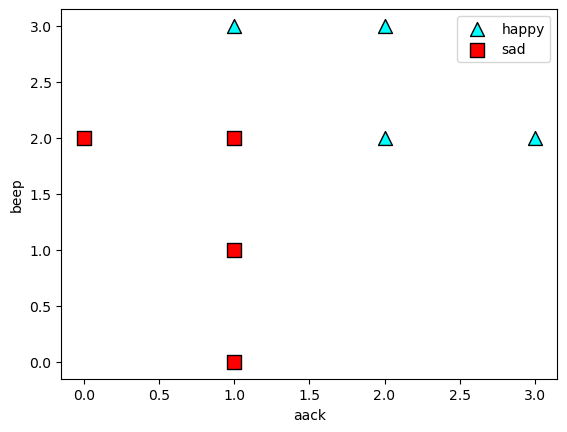

In [11]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [12]:
# create score function
def score(weights, bias, features):
    return features.dot(weights) + bias
# create step function
def step(x):
    if x >= 0:
        return 1
    else:
        return 0
# create prediction function
def prediction(weights, bias, features):
    return step(score(weights, bias, features))
def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))
# create mean perceptron error function
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [13]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [14]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [15]:
# Shorter version of the perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [16]:
perceptron_trick(weights, bias, features[6], 0)

([0.98, 1.97], -4.01)

### Running the perceptron algorithm

In [17]:
# set the seed to 0, so the result can be reproduced
random.seed(0)
# create the perceptron algorithm
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

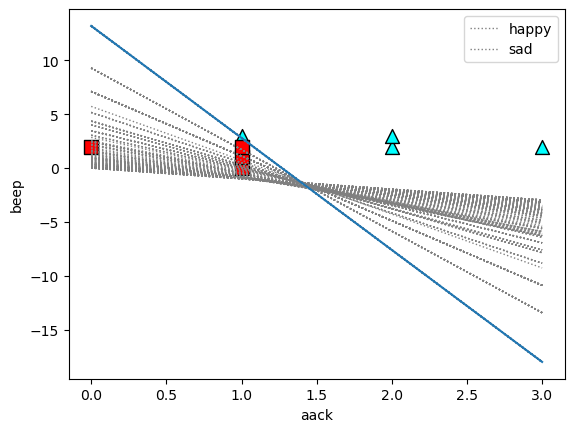

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

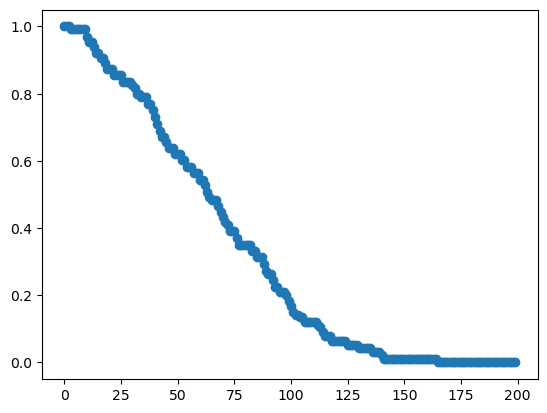

In [18]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using Turi Create

In [19]:
import turicreate as tc

In [20]:
# create a dictionary to show the sentences and predictions
datadict = {'aack': features[:,0], 'beep':features[:,1], 'prediction': labels}
# put the dictionary into a turi create date frame
data = tc.SFrame(datadict)
# show the dataset
data

aack,beep,prediction
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


In [21]:
# train the dataset in turi create logistic classifier model
perceptron = tc.logistic_classifier.create(data, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.001511     | 1.000000          |

| 2         | 3        | 1.002701     | 1.000000          |

| 3         | 4        | 1.003695     | 1.000000          |

| 4         | 5        | 1.004884     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [22]:
# show the weights and bias
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685022,6.844844514902377
aack,None,1,2.972553703911967,2.6977310191336046
beep,None,1,2.498635186535742,2.4552961030591502


## Answers

**1)a How many data points are there? What is represented by the x- and y-coordinates in the scatter plot?**

In [23]:
# get the length of the features
print('The total number of data points is:', len(features))

The total number of data points is: 8


x-coordinate presents the number of the appearances of the word 'aack', y-coordinate presents the number of the appearances of the word 'beep'.

**1)b In the labels array, what is represented by a 0? What is represented by a 1?**

0 represents that the mood of the alien is not happy; 1 represents that the mood of the alien is happy.

**2)a What initial weight is given to the number of ‘aacks’ and to the number
of ‘beeps’? What is the initial bias?**

The initial weights is set to 1.0 for both words; and the initial bias is set to 0.0.

**2)b What learning rate is used? Explain how learning rate affects the
algorithm.**

The learning rate is set to 0.01. It will slightly adjust the line for each iteration to separate two classes of points better. Learning rate controls the size of the adjustments.

**2)c Explain what an epoch is. How many epochs are used in training?**

An epoch is an iteration of training. The epochs in training is set to 200.

**2)d After training, what values are assigned to the ‘aacks’ weight, ‘beeps’ 
weight and the bias?**

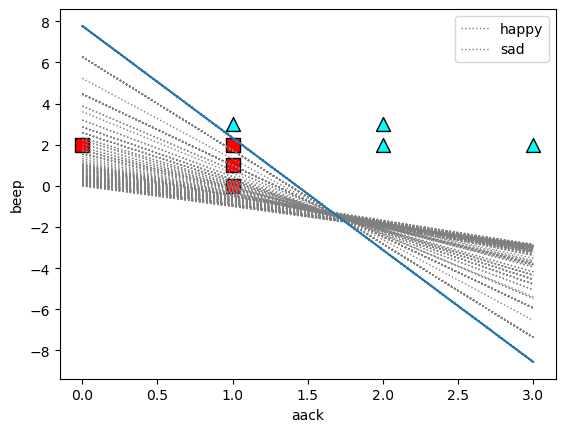

The bias: -0.7000000000000004 ; The 'aacks' weight: 0.48999999999999955 ; The 'beeps' weight: 0.08999999999999939


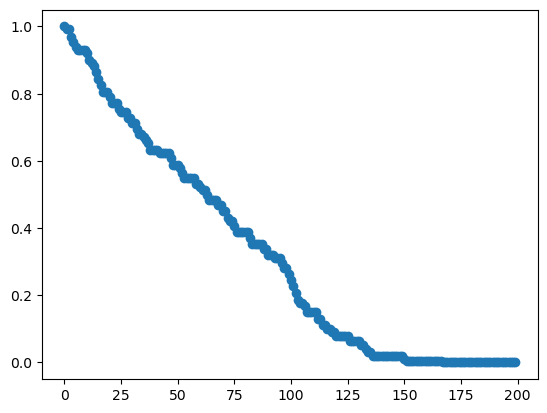

In [24]:
# train the model and get the final weights and bias
weights, bias = perceptron_algorithm(features, labels)
# assign the weights of 'aacks' and 'beeps' to variables weight_a and weight_b
weight_a, weight_b = weights
# print out the bias and weights
print('The bias:', bias, "; The 'aacks' weight:", weight_a, "; The 'beeps' weight:", weight_b)

**2)e What percentage of points have the correct prediction?**

In [25]:
# print the columns' names
print('Predition     Label')
# loop through each sentence to make predictions and print out the results and corresponding labels
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), '\t\t', labels[i])

Predition     Label
0 		 0
0 		 0
0 		 0
0 		 0
1 		 1
1 		 1
1 		 1
1 		 1


100% of points have the correct prediction.

**2)f From the plot of error vs. epoch, could less epochs have been used to
achieve similar performance? Would more training have made a significant
improvement?**

Less epochs could have been used to achieve similar performance because we can see that the error reaches 0 at around epoch 140, meaning that every point is correctly classified. 
<br>More training would not improve significantly because the line already classfies every point correstly.

**2)g Explain the meaning of stochastic, mini-batch and batch gradient
descent.**

Stochastic gradient descent: we train models by iterating on one point at a time and updates the parammeters accordingly.
<br>Mini-batch gradient descent: data is divided into many small mini-batches. In each iteration, we pick one of the mini-batches and proceed to adjust the weights and bias of the model to reduce the error in that mini-batchuse a mini-batch. 
<br>Batch gradient descent: we use the entire dataset and update the parameters after each iteration.

**3)a After training, what values are assigned to the ‘aacks’ weight, ‘beeps’
weight and the bias? Are these values different or the same as those found in the
“Running the perceptron algorithm” section?**

In [26]:
# get values of the bias and weights from the 'value' column
bias_tc, weight_tc_a, weight_tc_b = perceptron.coefficients['value']
# print out the results and round them to 4 decimals
print('The perceptron algorithm using Turi Create:' , '\n'
      ,  'The bias:', round(bias_tc, 4), "; The 'aacks' weight:", round(weight_tc_a, 4), "; The 'beeps' weight:", round(weight_tc_b, 4),  '\n')
# print out the results of bias and weights from the perceptron we code by hand
print('The perceptron algorithm bias in the “Running the perceptron algorithm” section:', '\n'
      , 'The bias:', round(bias, 4), "; The 'aacks' weight:", round(weight_a, 4),  "; The 'beeps' weight:", round(weight_b, 4))

The perceptron algorithm using Turi Create: 
 The bias: -8.9597 ; The 'aacks' weight: 2.9726 ; The 'beeps' weight: 2.4986 

The perceptron algorithm bias in the “Running the perceptron algorithm” section: 
 The bias: -0.7 ; The 'aacks' weight: 0.49 ; The 'beeps' weight: 0.09


The bias, and the weights of 'aacks' and 'beeps' are different between the two perceptron algorithms.

**3)b What percentage of points have the correct prediction? How does this
compare with the results of the “Running the perceptron algorithm” section?**

In [36]:
# get the predictions by turi create preceptron algorithm
prediction_tc = perceptron.predict(data)
# create an empty list to collect the results of a loop
prediction_mc = []
# loop through features to get the predictions by the perceptron we code by hand
for i in range(len(features)):
    prediction_mc.append(prediction(weights, bias, features[i]))
# create a dictionary to collect labels, predictions from both algorithms
compare_dict = {'Labels': labels, 'Prediction by Turi Create': prediction_tc, 'Prediction by Manual Code': prediction_mc}
# put the dictionary into a turi create data frame
compare = tc.SFrame(compare_dict)
# show the data frame
compare

Labels,Prediction by Manual Code,Prediction by Turi Create
0,0,0
0,0,0
0,0,0
0,0,0
1,1,1
1,1,1
1,1,1
1,1,1


In [35]:
# use turi create evaluation function to get the accuracy of the perceptron by turi create
accuracy = tc.evaluation.accuracy(data['prediction'],prediction_tc,average='macro')
# print out the accuracy showing in percentage
print('The accuracy is:', "{:.0%}".format(accuracy))

The accuracy is: 100%


The model shows 100% of points have the correct prediction, which means every point in the dataset has been correctly classified.

They have different weights and bias but both perceptron algorithms work well in the dataset which means they both classify the points correctly.

**3)c Is there only a single choice of weights and bias that gets the predictions
correct, or are there other choices of weights and bias that would achieve the same
accuracy? Explain.**

There are more than one choice of weights and bias that give accurate predictions. We see in the perceptron algorithm using Turi Create versus the algorithms we code by hand. Because there are a continuum of lines that can separate the two classes of points, there will always exist an infinite range of weights and bias that will work. 